In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
games = pd.read_csv('/content/drive/My Drive/Colab Notebooks/1. Data/vgsales.csv')

In [ ]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##**DATA CLEANING AND MANIPULATION**

In [ ]:
# Check the dataset

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Count null values

games.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Check if there any duplicated values

games.duplicated().sum()

0

No duplicate data found, GREAT!

Next, we need to work up with missing value. From above information, we have **2 column** with missing value, **'Publisher'** and **'Year'**.

To fill the missing value for **'Publisher'** we must identify the common publisher for each platform, so we can fill in based on the information.
On the other hand, for **'Year'** we decide to drop the null values, since there are no valid parameter to help fill the null values,to avoid ambiguous result.

In the dataset, the Year column is currently stored as a float, which displays values with a decimal point **(e.g., 2008.0, 2009.0)**. Since the Year column represents years, it is more appropriate and cleaner to store these values as integers. The presence of .0 is unnecessary and can be misleading, as years are inherently whole numbers without fractional components.

In [ ]:
# Fill in null values 'Publisher'
# Identify the most common publisher for each platform

most_publishers = games.groupby('Platform')['Publisher'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill missing publisher values using this mapping

def fill_publisher(row):
    if pd.isnull(row['Publisher']):
        return most_publishers.get(row['Platform'], row['Publisher'])
    return row['Publisher']

games['Publisher'] = games.apply(fill_publisher, axis=1)

In [ ]:
# Drop rows where 'Year' column has null values

games = games.dropna(subset=['Year'])

In [ ]:
#Let's check the data once more

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


GREAT! Now we have clean data with no **null** and **duplicate**, we can move on to next step, convert **'Year'** Column to **Integer** from **Float**

In [ ]:
games['Year'] = games['Year'].astype(int)

<ipython-input-45-5711ce0e2b35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['Year'] = games['Year'].astype(int)


In [ ]:
# Filter only numerical columns

numerical_games = games.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Filter only numerical columns

categorical_games = games.select_dtypes(include=['object'])

## **CORRELATION AND DESCRIPTIVE ANALYSIS**

In [ ]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Let's do Descriptive Statistics with the dataframe

games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Based on above data, **Sales** in **North America** has the highest number of sales among other region.

In [ ]:
# correlation heatmap

numerical_games.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.400328,-0.379024,-0.269138,-0.332521,-0.426880
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.400328,-0.091402,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,-0.379024,0.006014,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.269138,-0.169316,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,-0.332521,0.041058,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,-0.426880,-0.074735,0.941268,0.903271,0.612794,0.747974,1.000000


<Axes: >

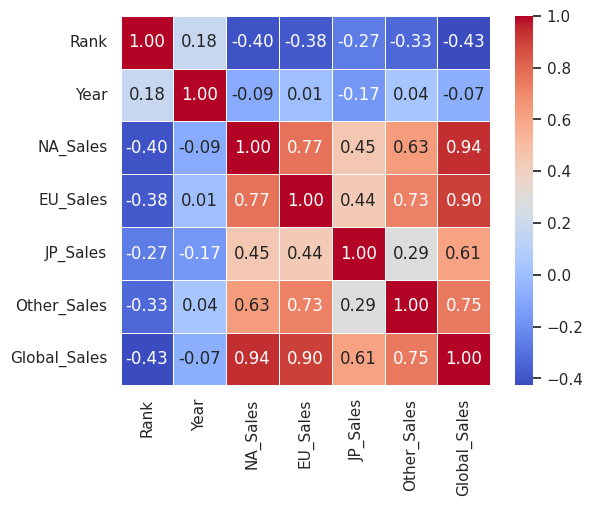

In [ ]:
# Correlation Heatmap

correlation = numerical_games.corr()
sns.heatmap(correlation,
            annot=True,  # Annotate the cells with correlation coefficients
            fmt=".2f",   # Format the annotations to 2 decimal places
            cmap="coolwarm",  # Set the color map
            linewidths=0.5,  # Set the width of the lines that divide cells
            square=True)  # Make the cells square

# (fig. 1)

From above heatmap, sales on all region are highly correlated with global sales.

## **UNIVARIATE ANALYSIS**

<ipython-input-52-aa8e4dc76d07>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=games['Platform'], order=platform_order, palette='viridis')


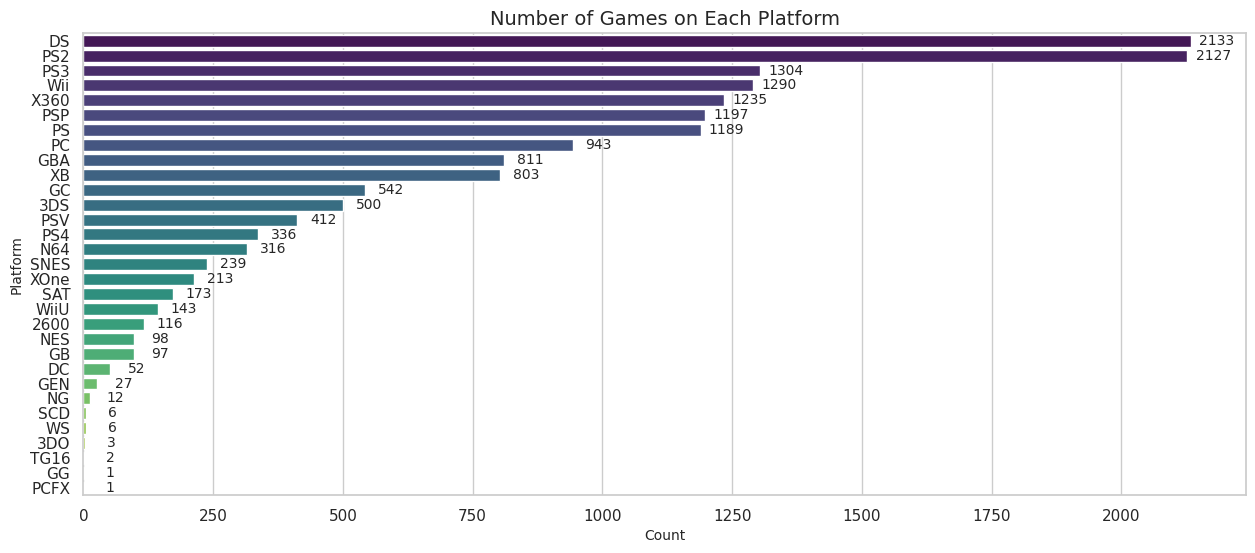

In [ ]:
# Number of Games on Each Platform

# Set style for seaborn
sns.set(style="whitegrid")

# Create a countplot for the 'Platform' column
plt.figure(figsize=(15, 6))
platform_order = games['Platform'].value_counts().index
ax = sns.countplot(y=games['Platform'], order=platform_order, palette='viridis')

# Add labels to each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2,
             f'{int(width)}', ha='center', fontsize=10, va='center')

plt.title('Number of Games on Each Platform', fontsize=14)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Platform', fontsize=10)
plt.show()

As we can see games disribution over the year dominated with **GAMES published for Nintendo DS with 13,1%**, followed by **Playstation 2 with only 0.1% different, 13%**, and in the third place is **Playstation 3 with 8.0%**. Upon analyzing the distribution of games across various platforms, it's evident that **older platforms** have a **higher number of game variants** compared to **newer platforms**. Historically, game development was more concentrated on fewer platforms, leading to a higher concentration of games on these older systems.

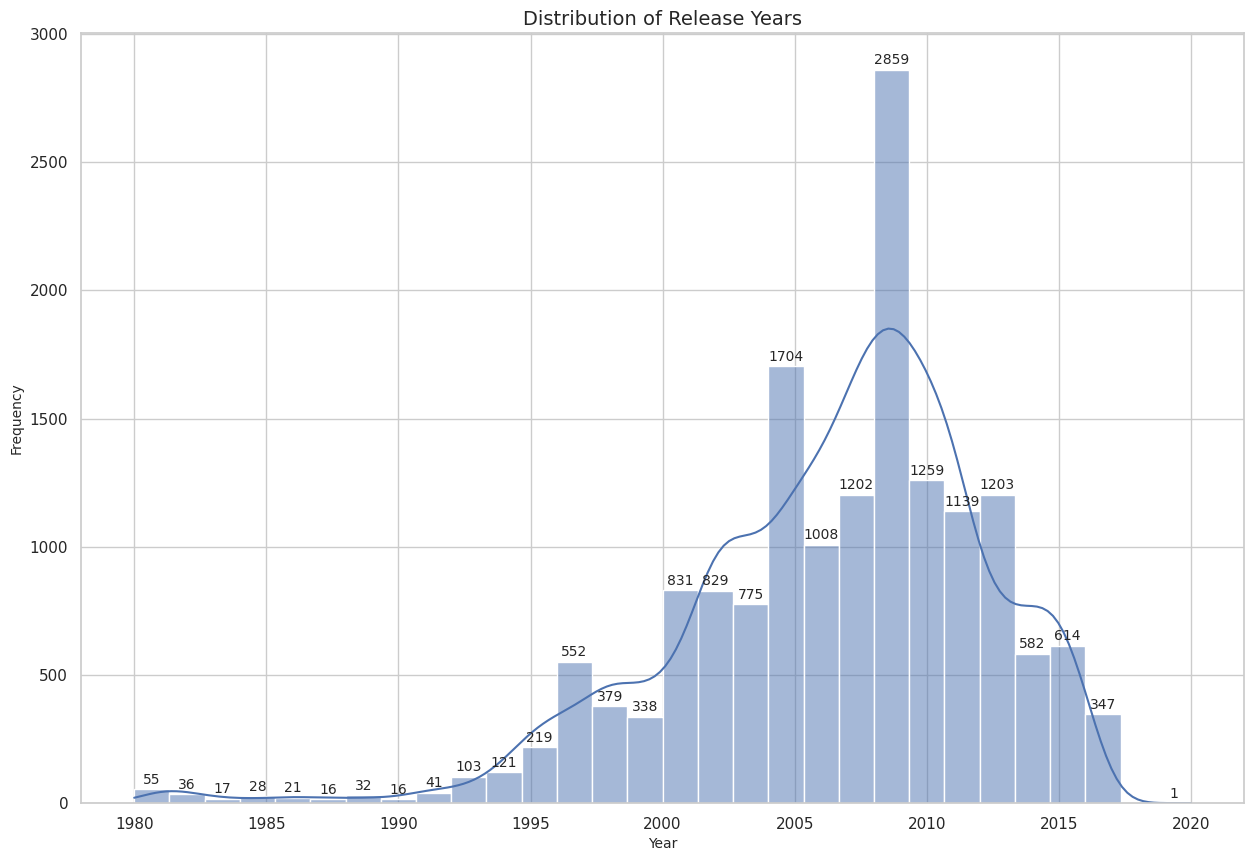

In [ ]:
# Univariate Analysis on 'Year'

plt.figure(figsize=(15, 10))
ax = sns.histplot(games['Year'], bins=30, kde=True)

# Adding annotations
bin_edges = ax.patches[0].get_bbox().get_points()[:, 0]
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 10,
                 f'{int(height)}', ha='center', fontsize=10, va='bottom')

plt.title('Distribution of Release Years', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

**'Year 2009'** was the peak of games distribution, with **2859** released at that year. Improvements in gaming technology and the rise of new gaming platforms.

Several major game franchises released new titles in 2009, driving up the number of game releases. Titles from popular franchises such as "Call of Duty: Modern Warfare 2", "Assassin’s Creed II", and "Uncharted 2: Among Thieves" were released, contributing to the high number of game launches.

The rise of digital distribution platforms, such as Steam and the PlayStation Network, made it easier for developers to release games and for consumers to purchase them. This shift reduced barriers to entry for game developers.

<ipython-input-54-ff272bf251d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=games['Genre'], order=games['Genre'].value_counts().index,


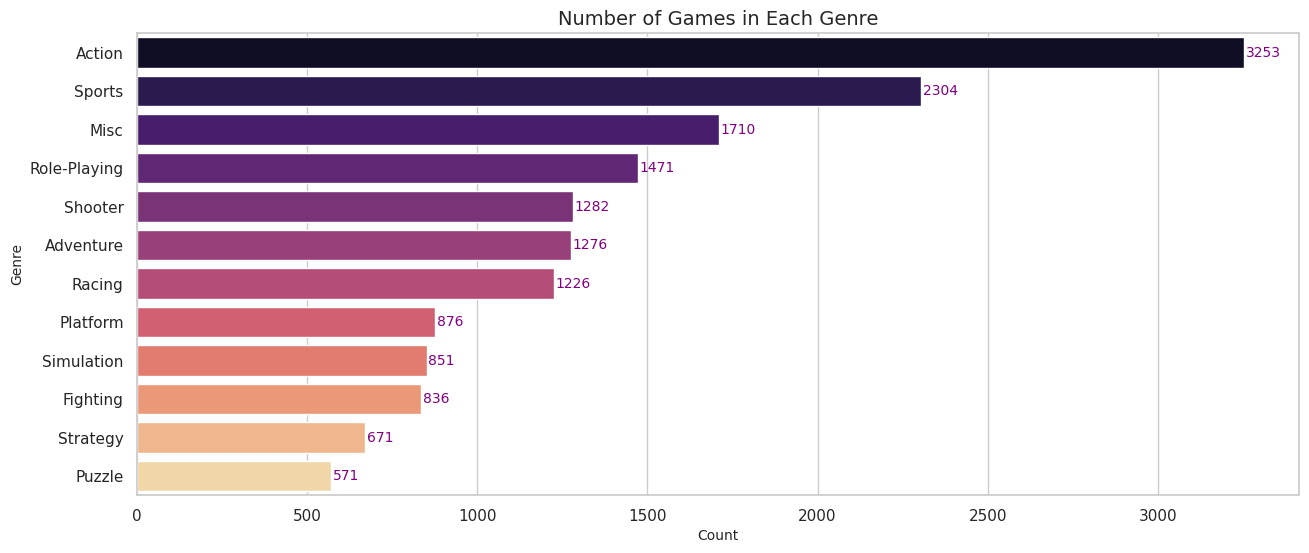

In [ ]:
# Univariate Analysis on 'Genre'

plt.figure(figsize=(15, 6))
ax = sns.countplot(y=games['Genre'], order=games['Genre'].value_counts().index,
                   palette='magma')

# Adding annotations with custom font size and color
for patch in ax.patches:
    width = patch.get_width()
    if width > 0:
        plt.text(width + 5, patch.get_y() + patch.get_height() / 2,
                 f'{int(width)}', ha='left', va='center', fontsize=10, color='purple')

plt.title('Number of Games in Each Genre', fontsize=14)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Genre', fontsize=10)
plt.show()

Overall, **Action** is the top game genre ever produced. Action games are known for their high engagement levels, offering dynamic gameplay and immediate feedback, which attract a large audience. The action genre encompasses a variety of subgenres such as shooters, fighting games, and adventure-action hybrids, catering to different player preferences.

 The **second most popular genre, is Sport**, known for simulating real-life sports and appealing to sports enthusiasts. It attracts both sports fans and gamers, with popular franchises release new versions yearly, keeping the genre fresh and relevant.

 Next we have **'Misc'** and **'Role-Playing Games'** encompasses a wide range of unique and innovative games that don't fit into traditional genres, and focuses on deep and engaging narratives.

## **BIVARIATE ANALYSIS**

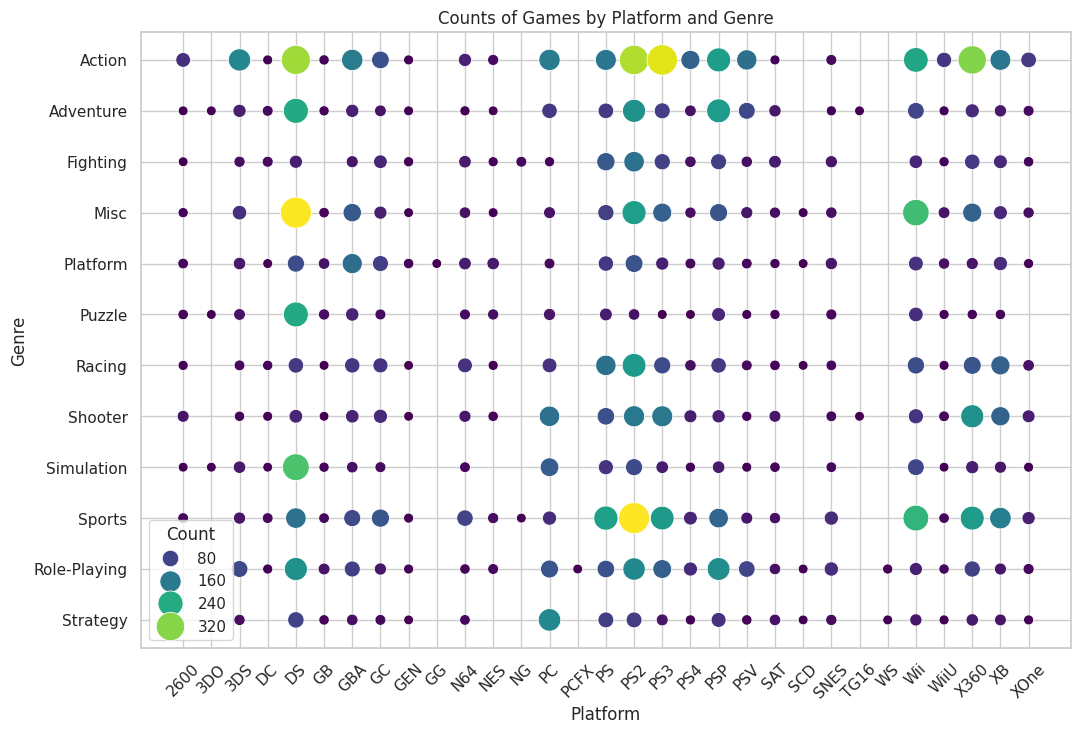

In [ ]:
# Platform x Genre

# Create a DataFrame with count values for dot plot
count_data = games.groupby(['Platform', 'Genre']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=count_data, x='Platform', y='Genre', size='Count', hue='Count', palette='viridis', sizes=(50, 500))
plt.title('Counts of Games by Platform and Genre')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.legend(title='Count')
plt.xticks(rotation=45)
plt.show()

Each platform has their own games, and a few of them are multi-platform games, meaning that it can be played on different type of platform. Many games, especially those from major franchises, are developed to be played across multiple platforms, including Sony's PlayStation consoles. Multi-platform games allow developers to reach a wider audience by ensuring that their titles are available on as many systems as possible. This trend is particularly evident in popular genres like sports and action, where games like FIFA and Call of Duty are released on various platforms simultaneously.

For Sony-based Platform (PS, PS2, PS3, PSP, and PS4) Sports, and Action are the most games available on platform. For Nintendo (DS, 3DS, Wii, and WiiU), They mostly cover all type of genres, especially Miscellanous and Action.

<ipython-input-56-7211b0d04ca7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=games, x='Genre', y='Global_Sales', jitter=True, palette='Set2')


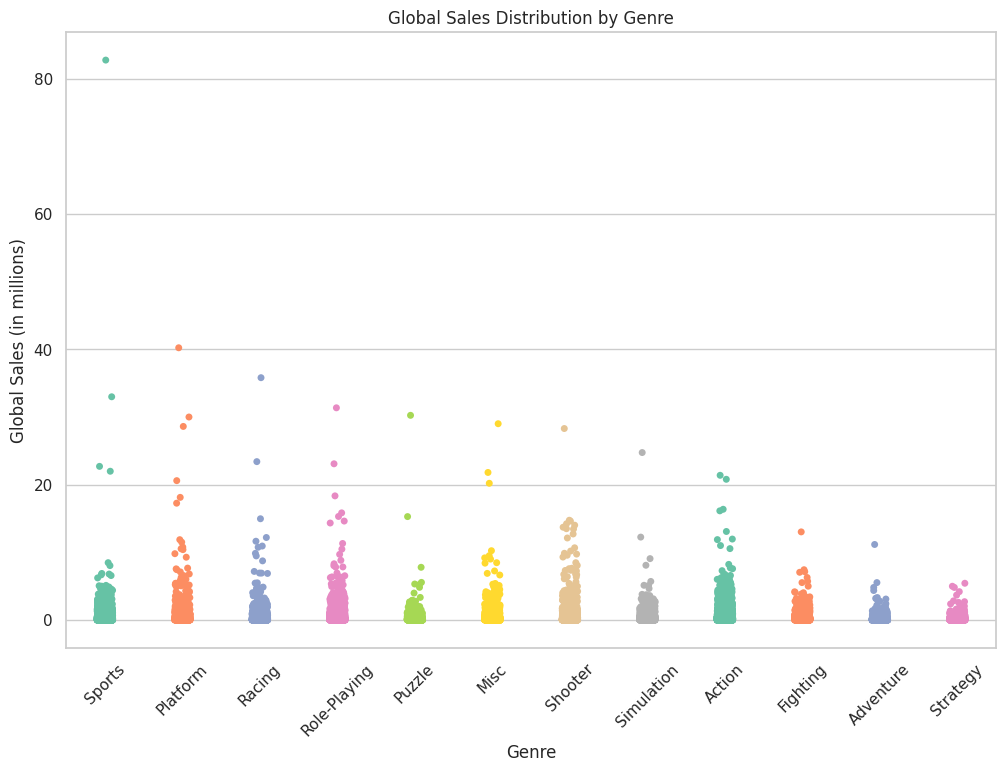

In [ ]:
# Global Sales by Genre

plt.figure(figsize=(12, 8))
sns.stripplot(data=games, x='Genre', y='Global_Sales', jitter=True, palette='Set2')
plt.title('Global Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Based on sales, the best-selling genre was Sports, followed by Platform, Racing, and Role-Playing.

1. Sports
Sports games lead the pack, often due to the annual release cycles of popular franchises like FIFA, Madden NFL, and NBA 2K. These games have a broad appeal, particularly in North America and Europe, where sports culture is deeply ingrained. The competitive nature and continuous updates with each new season help maintain strong sales year after year.

2. Platform
Classic Appeal: Platform games, which involve guiding characters through obstacles to reach a goal, have been popular since the early days of gaming. Iconic franchises like Super Mario, Sonic the Hedgehog, and Crash Bandicoot have helped this genre maintain strong sales. The nostalgic factor and appeal to a wide demographic, from children to adults, contribute to its success.

3. Racing
High-Speed Thrills: Racing games, led by franchises like Mario Kart, Gran Turismo, and Need for Speed, have a dedicated fan base. The thrill of high-speed competition, combined with realistic graphics and physics in some titles, keeps players coming back. Racing games often have a strong multiplayer component, further driving their popularity.

4. Role-Playing (RPG)
Immersive Worlds: RPGs have captivated players with their deep storylines, character development, and immersive worlds. Franchises like Final Fantasy, The Elder Scrolls, and Pokémon have not only sold millions of copies but have also built long-lasting fan communities. RPGs often feature extensive gameplay hours, making them a great value proposition for players, which supports their strong sales.

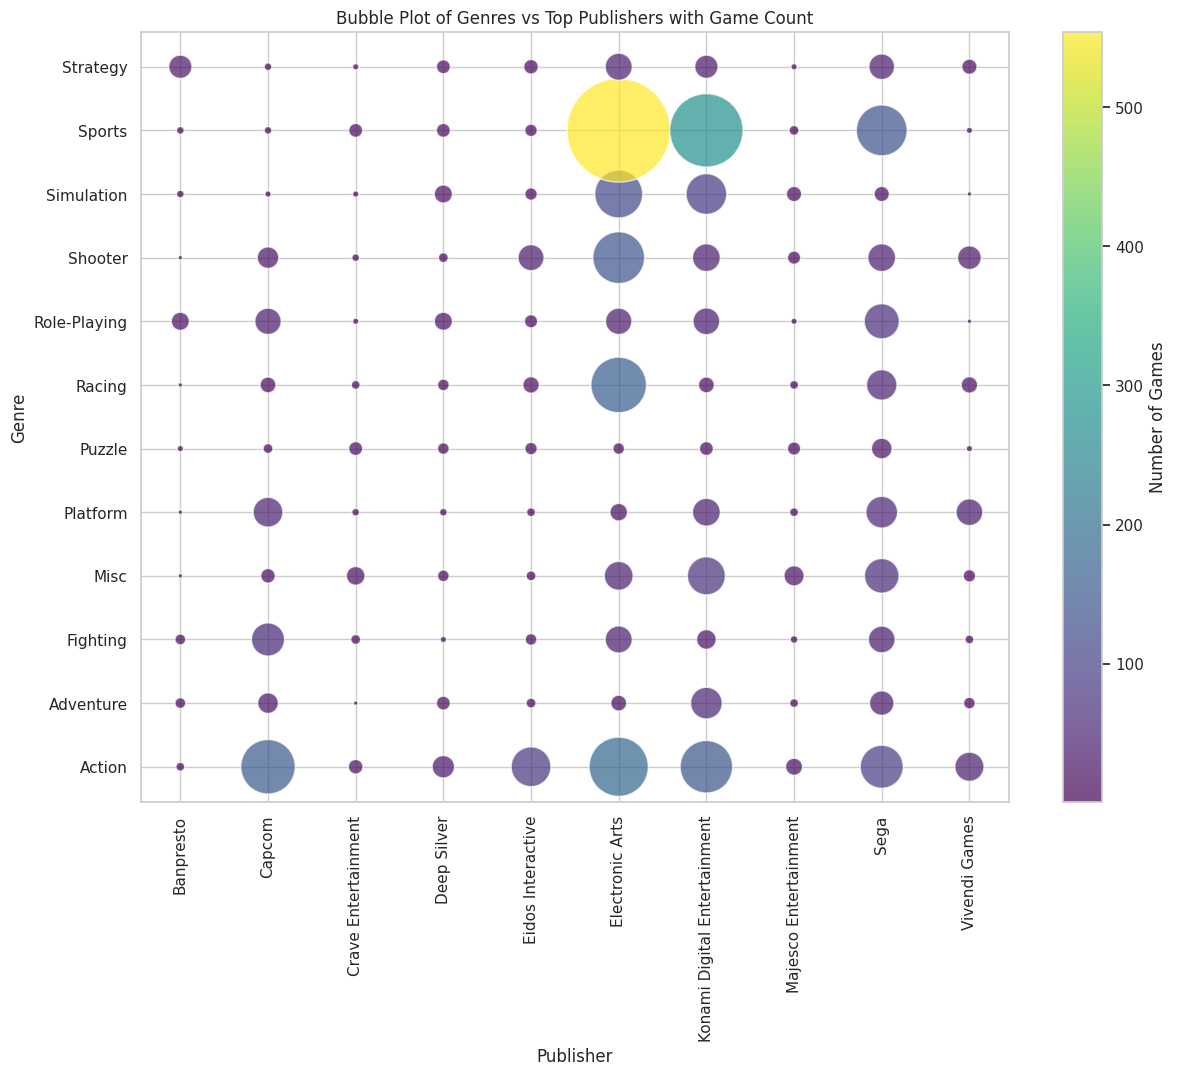

In [ ]:
# Genre vs Top Publisher

# Aggregate number of games per genre and publisher
genre_publisher_counts = games.groupby(['Genre', 'Publisher']).size().reset_index(name='Count')

# Get top N publishers
top_publishers = genre_publisher_counts['Publisher'].value_counts().head(10).index
filtered_data = genre_publisher_counts[genre_publisher_counts['Publisher'].isin(top_publishers)]

# Create bubble plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    x=filtered_data['Publisher'],
    y=filtered_data['Genre'],
    s=filtered_data['Count'] * 10,  # Scale size of the marker
    c=filtered_data['Count'],       # Color by count
    cmap='viridis', alpha=0.7, edgecolors='w'
)

plt.colorbar(scatter, label='Number of Games')
plt.title('Bubble Plot of Genres vs Top Publishers with Game Count')
plt.xlabel('Publisher')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

For each publisher, has different focus on type of games they mostly released on different consoles. For example, Electronic Arts focussed on Sport genre games as well as Digital Entertainment. While CAPCOM mainly designed Action genre games.

## **MULTIVARIATE ANALYSIS**

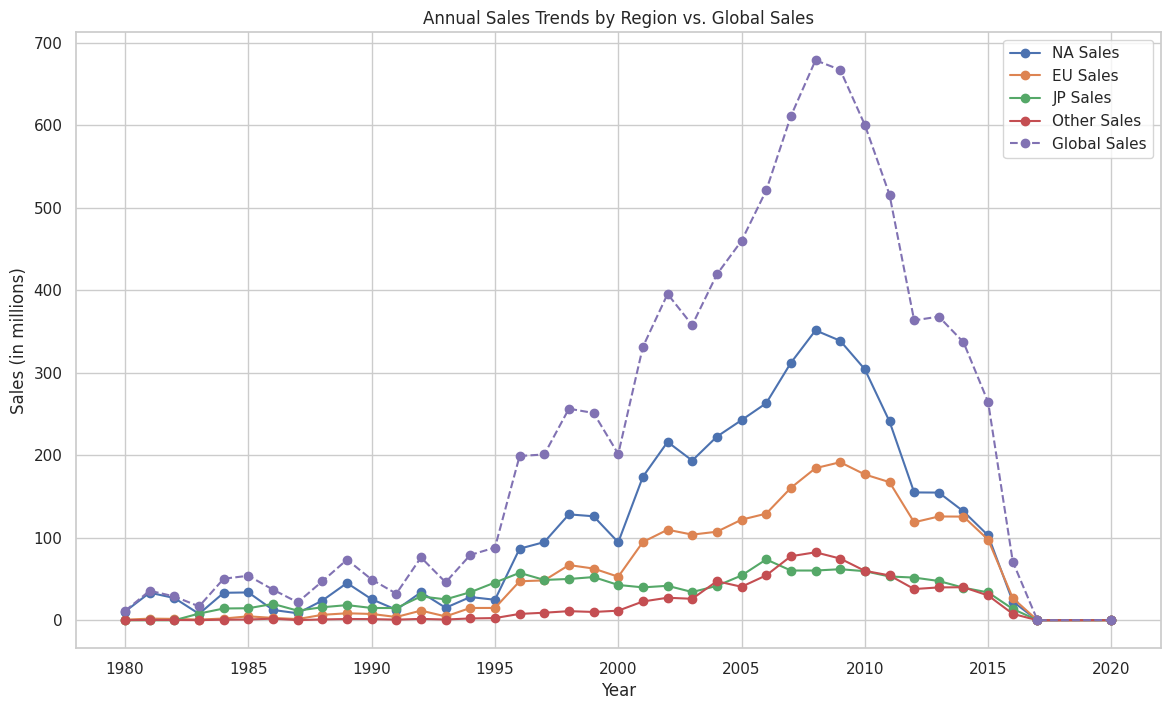

In [ ]:
# Sales Trend by Region and Globally

# Convert 'Year' to datetime
games['Year'] = pd.to_datetime(games['Year'], format='%Y')

# Aggregate sales data by year
annual_sales = games.groupby(games['Year'].dt.year).agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
})

# Plot line chart
plt.figure(figsize=(14, 8))
plt.plot(annual_sales.index, annual_sales['NA_Sales'], marker='o', label='NA Sales')
plt.plot(annual_sales.index, annual_sales['EU_Sales'], marker='o', label='EU Sales')
plt.plot(annual_sales.index, annual_sales['JP_Sales'], marker='o', label='JP Sales')
plt.plot(annual_sales.index, annual_sales['Other_Sales'], marker='o', label='Other Sales')
plt.plot(annual_sales.index, annual_sales['Global_Sales'], marker='o', linestyle='--', label='Global Sales')

plt.title('Annual Sales Trends by Region vs. Global Sales')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()

Globally, peak sales was in 2008. By 2008, the seventh generation of gaming consoles, including the PlayStation 3, Xbox 360, and Nintendo Wii, had been widely adopted globally. These consoles brought significant advancements in graphics, online gaming, and gameplay experiences, attracting a large number of gamers. Gaming had expanded into new markets, including emerging economies, where access to gaming consoles and software was becoming more widespread. This global expansion further contributed to the overall sales peak. In 2012, the global video game industry was in a transition period between the seventh and eighth generations of consoles. Many consumers held off on purchasing new games or consoles, waiting for the next generation of hardware (Xbox One and PlayStation 4), leading to a temporary drop in sales.

Based on above chart, North America (NA) most of the time, has the highest amount of sales, compared with other region, especially in 2008. Year 2008 was a peak period for certain gaming consoles, like the Nintendo Wii, Xbox 360, and PlayStation 3. These consoles were extremely popular in North America, leading to a surge in game sales. During this time, gaming became increasingly mainstream in North America, appealing to a broader demographic, including casual gamers and families, particularly with the success of the Wii. By 2012, the North American market had reached a level of saturation, particularly for the seventh-generation consoles like the Xbox 360, PlayStation 3, and Wii. Most households that were interested in gaming had already purchased these consoles, leading to a slowdown in new hardware and software sales.

While for Europe, the highest sales occured in 2009. The expansion of broadband internet in Europe during this period facilitated online gaming and digital downloads, contributing to increased game sales in 2009. While the global financial crisis hit in 2008, different regions recovered at varying paces. European consumers may have begun to feel more confident in 2009, leading to increased spending on entertainment, including video games. Europe was dealing with economic challenges, including the Eurozone crisis, which impacted consumer confidence and spending. This financial instability likely contributed to a decline in discretionary spending, including video games, in 2012.

Peak sales in Japan, happened in 2006. Japan has a robust market for domestically developed games, particularly in the RPG genre. In 2006, several major titles like Final Fantasy XII and New Super Mario Bros. were released, which contributed to the sales peak. In 2016, there were not many major blockbuster releases in Japan that could drive console sales to previous levels.

For region outside NA, EU, and JP, peak sales happened in 2008, same like North America. Many blockbuster games released in 2008 had universal appeal and were marketed globally. Titles like Grand Theft Auto IV and Mario Kart Wii were popular across various regions, not just in the major markets. This widespread appeal helped push sales figures higher in other regions as well. The gaming industry increasingly adopted global marketing strategies that targeted consumers in various regions simultaneously. This helped to create a synchronized peak in sales across multiple markets. Economic slowdowns in various emerging markets could have impacted disposable income in 2016, reducing spending on entertainment products like video games.

### **Multivariate Regression Model**

In [ ]:
# Features and target variable

X = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = games['Global_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2.7154099641219024e-05
R^2 Score: 0.999993644506754


In [ ]:
# Coefficients
coefficients = model.coef_
features = X.columns

for feature, coef in zip(features, coefficients):
    print(f'Feature: {feature}, Coefficient: {coef}')


Feature: NA_Sales, Coefficient: 0.9999454169004024
Feature: EU_Sales, Coefficient: 0.9998342205985951
Feature: JP_Sales, Coefficient: 1.0000740556504368
Feature: Other_Sales, Coefficient: 0.9993494002659005


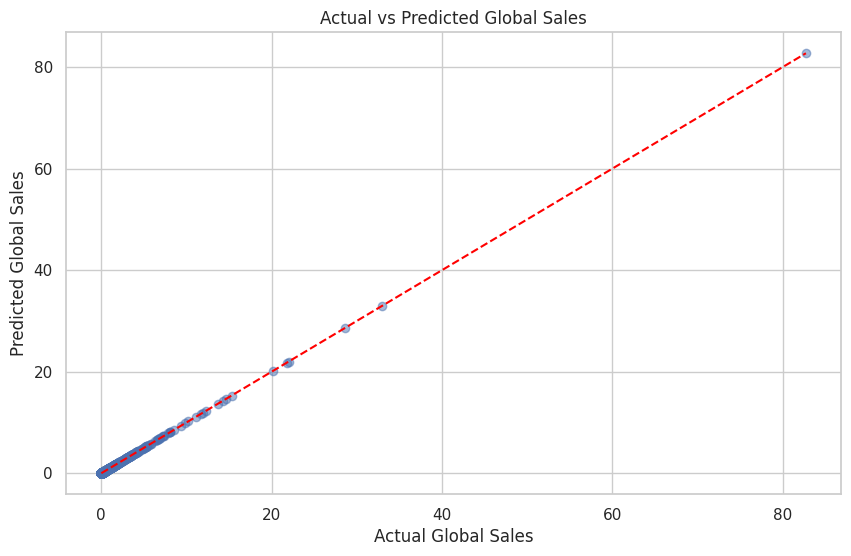

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.show()


As we can see, based on the chart, the **predicted** sales and **actual** sales follow the same pattern. This indicates that the model is effectively capturing the underlying trend in the data, suggesting that it is making accurate predictions. The alignment between predicted and actual sales patterns implies that the model's forecasting ability is reliable for understanding future sales behavior.

## **MODELING**

Here I want to segment each game by their sales performance. I'm using **KMeans Clustering**.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

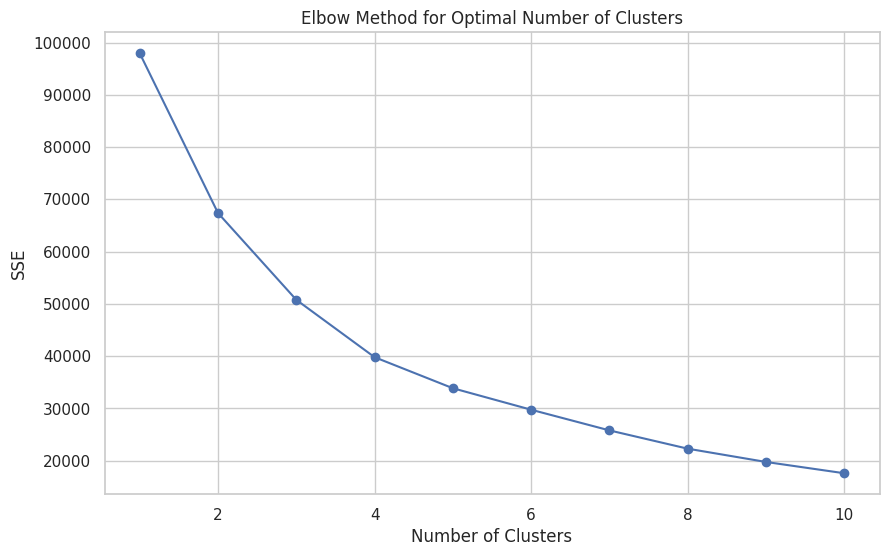

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


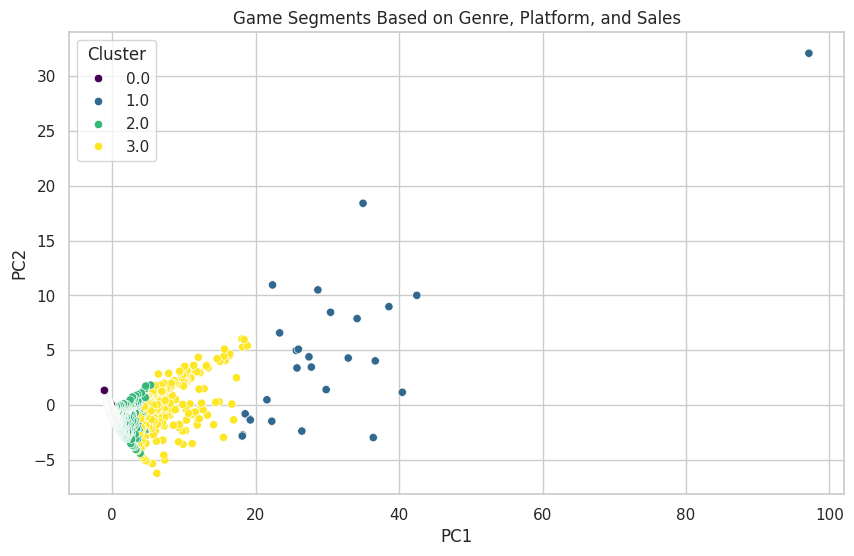

                 Rank   NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Cluster                                                             
0        12000.305147   0.039620  0.016243  0.020743     0.004892   
1           15.000000  12.714444  6.887778  3.952593     2.449630   
2         3931.719303   0.376344  0.195627  0.101022     0.064727   
3          252.451389   2.455116  1.712199  0.694190     0.547199   

         Global_Sales  
Cluster                
0            0.082056  
1           26.005926  
2            0.737654  
3            5.408403  


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Convert categorical variables to numerical
games_encoded = pd.get_dummies(games, columns=['Genre', 'Platform'], drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(games_encoded.select_dtypes(include=['float64', 'int64']))

# Choose the number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Perform KMeans clustering
optimal_k = 4  # Example: Choosing 4 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
games_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = games_encoded['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Game Segments Based on Genre, Platform, and Sales')
plt.show()

# Cluster Summary - Exclude non-numeric columns from aggregation
numeric_cols = games_encoded.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = games_encoded.groupby('Cluster')[numeric_cols].mean()
print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


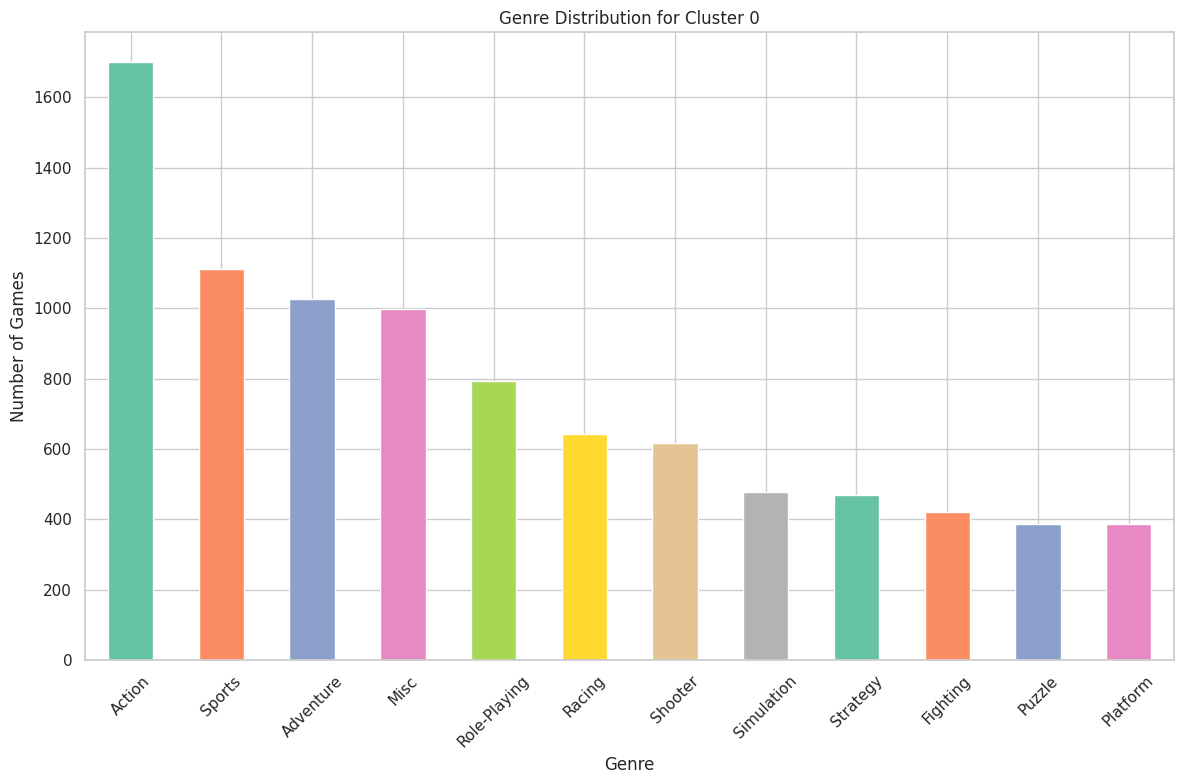

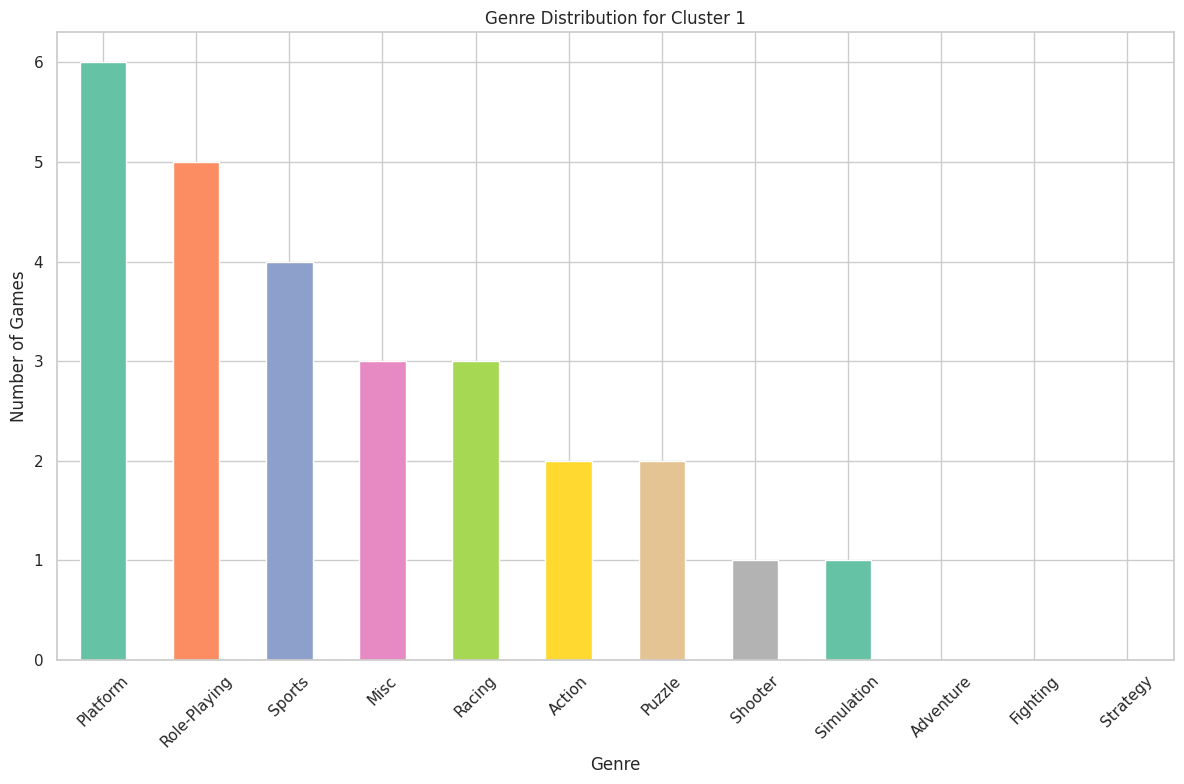

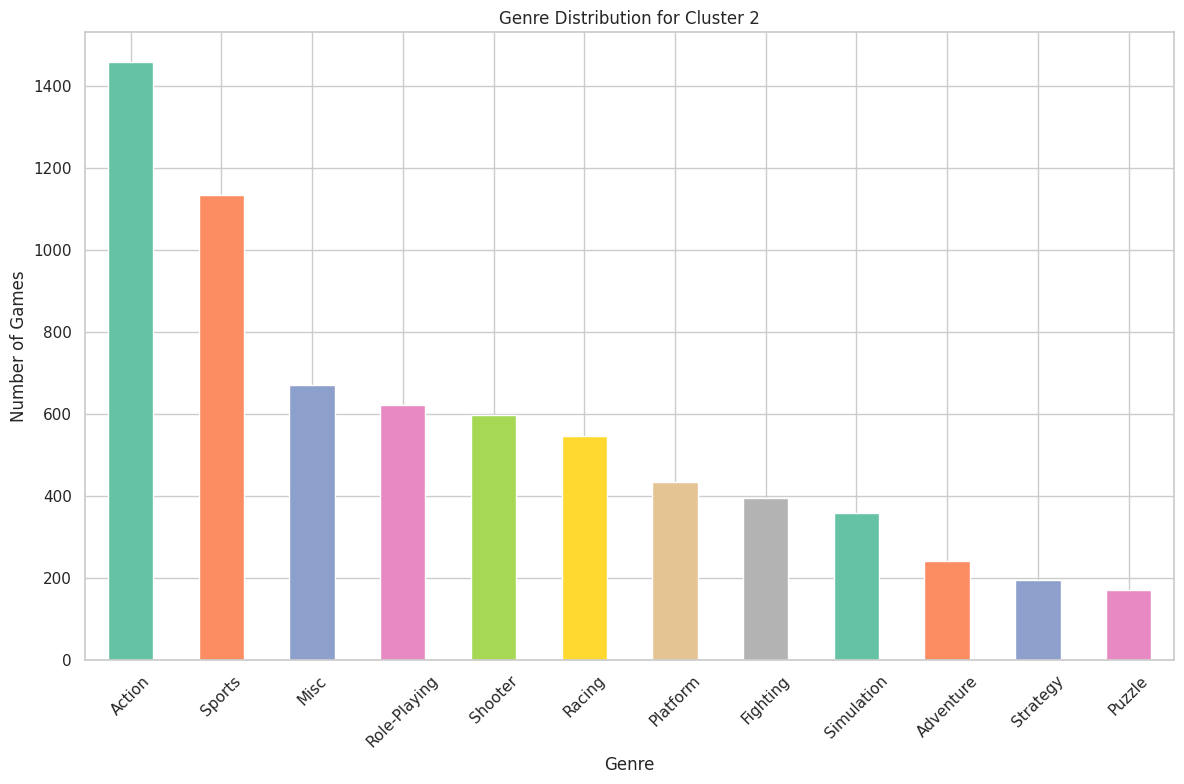

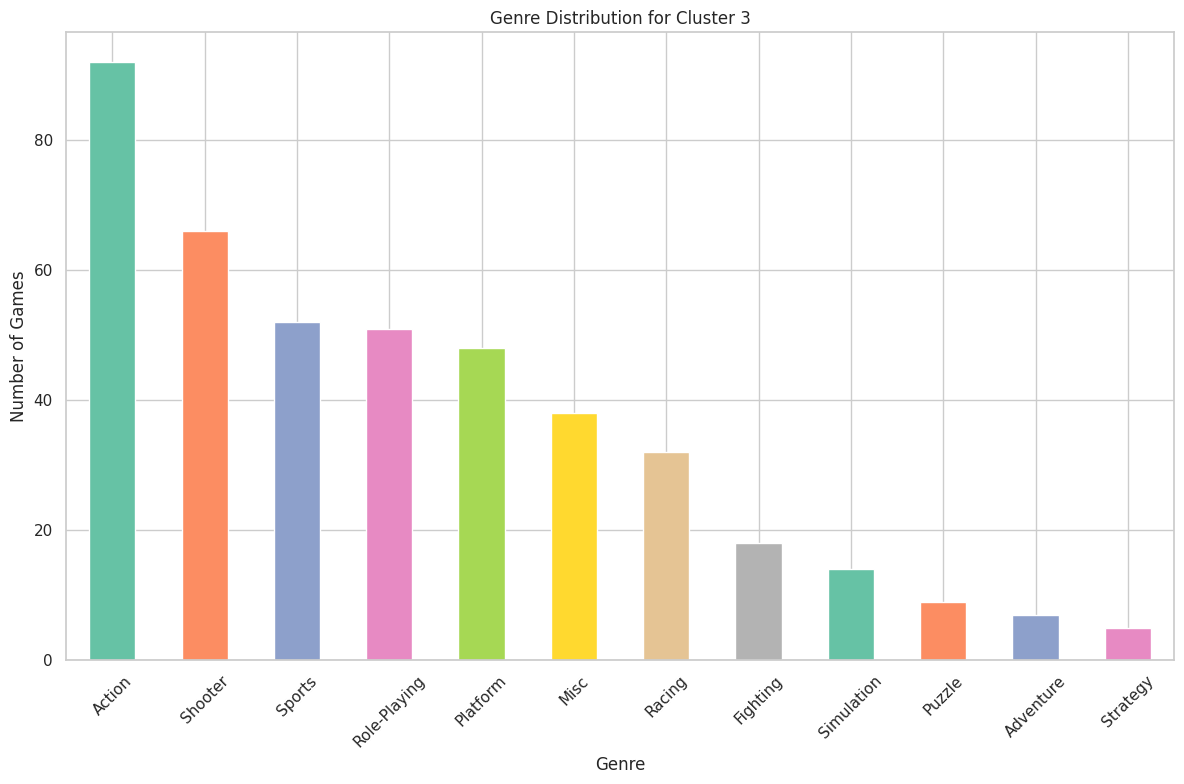

In [ ]:
# Add 'cluster' column
clusters = kmeans.fit_predict(scaled_data)
games['Cluster'] = clusters

# Analyze the distribution of genres within each cluster
genre_distribution = games.groupby(['Cluster', 'Genre']).size().unstack(fill_value=0)

# Create a color palette
palette = sns.color_palette("Set2", n_colors=genre_distribution.shape[1])

# Create a bar chart for each cluster
num_clusters = genre_distribution.index.max() + 1  # Get the number of clusters

for cluster in range(num_clusters):
    plt.figure(figsize=(12, 8))
    cluster_data = genre_distribution.loc[cluster].sort_values(ascending=False)
    cluster_data.plot(kind='bar', color=palette, figsize=(12, 8))
    plt.title(f'Genre Distribution for Cluster {cluster}')
    plt.xlabel('Genre')
    plt.ylabel('Number of Games')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Cluster 1** stands out as the cluster with the most successful games globally, indicating these are likely the top-performing games across all regions, dominated with **Platform**, **Role-Playing**, and **Sports** genre, while **Simulation** genre was the lowest performance out of all genre.. Games in this cluster can be used as marketing standard, to help improve performance from the other clusters.

**Cluster 0** contains games that perform poorly in all regions, possibly indicating niche or less popular genres or platforms, dominated with **Action**, **Sports**, and **Adventure** genre, while **Platform** genre has the lowest sale. Strategy for this cluster are  consider whether these games need reworking, rebranding, or could be targeted to niche audiences better.

**Cluster 2** and **Cluster 3** show varying degrees of regional success, with **Cluster 3** being moderately successful globally. Both of the cluster are dominated with **Action** genre. This cluster could be targeted for region-specific marketing strategies, as they show potential in certain regions.

In [ ]:
# Group by cluster and list the game titles in each cluster
cluster_games = games.groupby('Cluster')['Name'].apply(lambda x: ', '.join(x)).reset_index()

# Print or display the game names for each cluster
for i, row in cluster_games.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(row['Name'])
    print()

Cluster 0:
Big League Sports, Robotech: The Macross Saga, Bratz: Girlz Really Rock, RealSports Baseball, Hasbro Family Game Night 3, Rayman Raving Rabbids, Marvel Super Hero Squad, The Chronicles of Narnia: Prince Caspian, HBO Boxing, Darkwatch, Prince of Persia: Revelations, Bass Pro Shops: The Strike, The Fairly OddParents: Breakin' Da Rules, Namco Museum Megamix, Wedding Dash, The Land Before Time: Big Water Adventure, Cabela's Deer Hunt: 2004 Season, Disney's Planes, Brunswick Pro Bowling, World Series of Poker, ClayFighter 63 1/3, Monopoly, WCW Nitro, Cruis'n Exotica, Gex 3: Deep Cover Gecko, WinBack: Covert Operations, Heroes of Ruin, WipeOut 3 The Game, SBK Superbike World Championship, Bionicle, Angel Blade: Neo Tokyo Guardians, Threads of Fate, Vampire Rain, Way of the Samurai 3, Unreal II: The Awakening, Spider-Man: Web of Shadows, Disgaea D2: A Brighter Darkness, Batman Begins, Just Dance: Greatest Hits, Shrek: Reekin' Havoc, Solatorobo: Red the Hunter, JSRF: Jet Set Radio F

In [ ]:
print(games['Cluster'].value_counts())

Cluster
0    9035
2    6833
3     432
1      27
Name: count, dtype: int64


In [ ]:
# Save the list of clustered games to CSV

columns_to_export = ['Name', 'Genre', 'Platform', 'Global_Sales', 'Cluster']
games_to_export = games[columns_to_export]

# Save the DataFrame to a CSV file
games_to_export.to_csv('games_clustered.csv', index=False)